## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
%matplotlib inline  

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [7]:
x_new=np.linspace(0,20).reshape(50,1)
ones = np.ones((50,1))
X = np.concatenate((ones, x_new), axis=1)
y=x_new*-2 + 1

In [8]:
X.shape, y.shape

((50, 2), (50, 1))

In [9]:
#Plot

In [10]:
# plt.scatter(x=data_df['X'], y=data_df['y'])
# plt.xlabel('X'); plt.ylabel('y');
# plt.title('Input dataset');

In [11]:
#Cost Function

In [12]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    #print(theta)
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [13]:
compute_cost(X,y)

array([249.8877551])

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

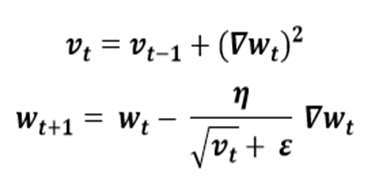

In [14]:
(np.array([[1],[1]])*4)/(np.sqrt(np.array([[1],[1]])*4))

array([[2.],
       [2.]])

In [15]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),V=np.array([[0],[0]]), alpha=0.01,epsilon=0.000001 ,num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    #print(theta)
    theta = theta.reshape(2,1)
    V=V.reshape(2,1)
    
    for i in range(num_iterations):
        
        
        error = (np.dot(X, theta) - y)
        term0 = (1/m) * sum(error* X[:,[0]].reshape(m,1))
        term1 = (1/m) * sum(error* X[:,[1]].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]]).reshape(2,1)
        
      
        
        V = V+  np.square(term_vector) 
        
        theta = theta - ((alpha* term_vector)/(epsilon *np.sqrt(V) ))
        #print(theta)
        
        # store history values
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
        J_history.append(compute_cost(X,y,theta)[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [16]:
%%time
alpha=0.00000001
num_iterations=200
theta_init=np.array([[2],[2]]).reshape(2,1)
v_init=np.array([[0],[0]])
epsilon=0.00000001
theta, J_history, theta0_history, theta1_history = gradient_descent(X ,y , theta_init , v_init , alpha ,epsilon ,num_iterations)

CPU times: user 53.6 ms, sys: 0 ns, total: 53.6 ms
Wall time: 55.5 ms


In [17]:
theta

array([[-0.36430388],
       [-1.89621418]])

In [18]:
theta0_history

[1.0,
 0.40949000561578275,
 -0.010044872352477086,
 -0.328908163260556,
 -0.5793504686661215,
 -0.7796027306625251,
 -0.9413360915670227,
 -1.0726577135057593,
 -1.1795229577599597,
 -1.2664803950688728,
 -1.3371003051235177,
 -1.3942391951123783,
 -1.440213223443708,
 -1.4769179441241542,
 -1.505914706195222,
 -1.528495303313832,
 -1.5457317771045278,
 -1.5585156577020152,
 -1.5675894098974756,
 -1.5735719482479225,
 -1.5769795257435675,
 -1.5782429435398109,
 -1.5777217926003049,
 -1.5757162752772702,
 -1.57247703865251,
 -1.5682133656625163,
 -1.5631000047680152,
 -1.5572828680499553,
 -1.55088378717199,
 -1.5440044840260687,
 -1.5367298862748127,
 -1.529130896141885,
 -1.521266702736681,
 -1.5131867132165036,
 -1.5049321656304115,
 -1.4965374759111956,
 -1.4880313628280202,
 -1.4794377874906328,
 -1.4707767379668686,
 -1.4620648845401978,
 -1.453316126928689,
 -1.4445420512740064,
 -1.4357523117747837,
 -1.4269549493876441,
 -1.4181566579717297,
 -1.4093630065424323,
 -1.400578624

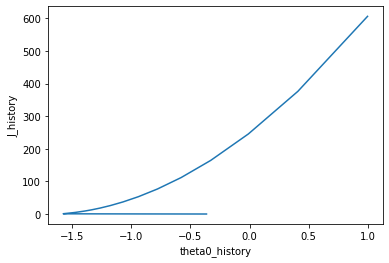

In [19]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta0_history")
plt.plot(theta0_history,J_history )

In [20]:
theta0_history


[1.0,
 0.40949000561578275,
 -0.010044872352477086,
 -0.328908163260556,
 -0.5793504686661215,
 -0.7796027306625251,
 -0.9413360915670227,
 -1.0726577135057593,
 -1.1795229577599597,
 -1.2664803950688728,
 -1.3371003051235177,
 -1.3942391951123783,
 -1.440213223443708,
 -1.4769179441241542,
 -1.505914706195222,
 -1.528495303313832,
 -1.5457317771045278,
 -1.5585156577020152,
 -1.5675894098974756,
 -1.5735719482479225,
 -1.5769795257435675,
 -1.5782429435398109,
 -1.5777217926003049,
 -1.5757162752772702,
 -1.57247703865251,
 -1.5682133656625163,
 -1.5631000047680152,
 -1.5572828680499553,
 -1.55088378717199,
 -1.5440044840260687,
 -1.5367298862748127,
 -1.529130896141885,
 -1.521266702736681,
 -1.5131867132165036,
 -1.5049321656304115,
 -1.4965374759111956,
 -1.4880313628280202,
 -1.4794377874906328,
 -1.4707767379668686,
 -1.4620648845401978,
 -1.453316126928689,
 -1.4445420512740064,
 -1.4357523117747837,
 -1.4269549493876441,
 -1.4181566579717297,
 -1.4093630065424323,
 -1.400578624

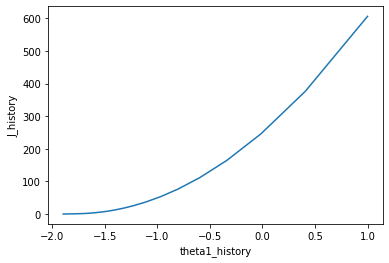

In [21]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta1_history")
plt.plot(theta1_history,J_history )

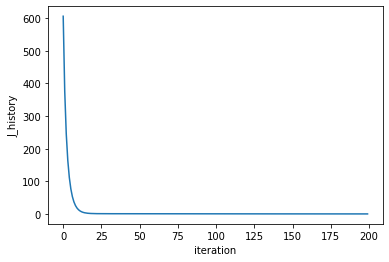

In [22]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )

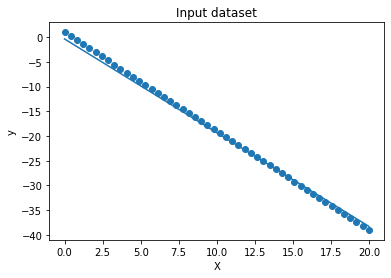

In [23]:
plt.scatter(x = X[:,1] , y = y )
plt.plot( X[:,1] , theta[1]*X[:,1]+theta[0] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

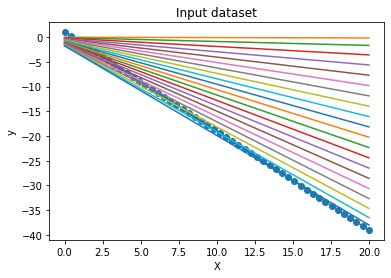

In [45]:
plt.scatter(x=X[:,1], y=y)
plt.plot( X[:,1] , theta[1]* X[:,1] + theta[0]  )
for i in range(1, 200 ,10):
    plt.plot( X[:,1] , theta1_history[i]*X[:,1]+theta0_history[i] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

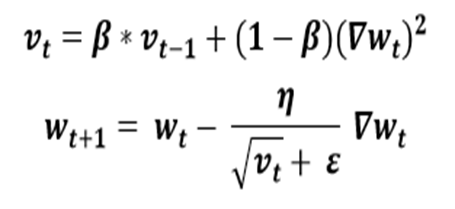

In [46]:
def gradient_descentt(X, y, theta=np.array([[0],[0]]),V=np.array([[0],[0]]), alpha=0.01,epsilon=0.000001 ,num_iterations=1500 ,beta=0.2):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    #print(theta)
    theta = theta.reshape(2,1)
    V=V.reshape(2,1)
    
    for i in range(1500):
        
        
        error = (np.dot(X, theta) - y)
        term0 = (1/m) * sum(error* X[:,[0]].reshape(m,1))
        term1 = (1/m) * sum(error* X[:,[1]].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]]).reshape(2,1)
        
      
        
        V = (V*beta) +  ((1-beta)*np.square(term_vector)) 
        
        theta = theta - ((alpha* term_vector)/(epsilon +np.sqrt(V) ))
        #print(theta)
        
        # store history values
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
        J_history.append(compute_cost(X,y,theta)[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [26]:
%%time
alpha=0.1
episolen=0.00000001e-08
num_iterations=200
theta_init=np.array([[2],[2]])
v_init=np.array([[0],[0]])
jama=0.9
beta=0.8
theta, J_history, theta0_history, theta1_history = gradient_descentt(X ,y , theta_init, v_init , alpha ,episolen, num_iterations,beta)

CPU times: user 330 ms, sys: 4.95 ms, total: 335 ms
Wall time: 345 ms


In [27]:
theta

array([[ 0.95],
       [-2.05]])

In [28]:
theta0_history

[1.776393202250021,
 1.6144006161618307,
 1.4777023832367546,
 1.3551160252883465,
 1.241567487016179,
 1.13428979820297,
 1.0316018536734346,
 0.9324079674247361,
 0.8359588695072238,
 0.7417247353850487,
 0.6493222060830561,
 0.5584698221234716,
 0.46895947829378815,
 0.38063743085452334,
 0.29339127231532003,
 0.20714078626585902,
 0.12183141534618323,
 0.03742954623814815,
 -0.04608090335222338,
 -0.12870093685401848,
 -0.21041820010058432,
 -0.2912081283538183,
 -0.37103462583000846,
 -0.44985034939765023,
 -0.5275966426046667,
 -0.604203146972442,
 -0.679587102538485,
 -0.7536523377445353,
 -0.8262879393972863,
 -0.897366586611454,
 -0.9667425290924239,
 -1.0342491914404115,
 -1.0996963942660327,
 -1.1628672046065358,
 -1.2235144699899272,
 -1.2813571639125794,
 -1.3360767917789533,
 -1.3873142970689987,
 -1.4346681924500044,
 -1.4776950398404696,
 -1.5159139125002228,
 -1.548817021385566,
 -1.5758890761038493,
 -1.596637767223531,
 -1.6106363597022173,
 -1.6175760921428721,
 -1.

In [29]:
theta1_history

[1.776393202250021,
 1.614315987942828,
 1.4774970561329084,
 1.3547648572320363,
 1.2410491080571708,
 1.1335842377729928,
 1.0306894855149107,
 0.9312689301659429,
 0.8345726860093511,
 0.7400700199569995,
 0.6473764079362867,
 0.5562089775958496,
 0.4663579550788263,
 0.3776676523623398,
 0.29002341236835905,
 0.2033424248748499,
 0.11756714588653015,
 0.03266052319605407,
 -0.0513974886939267,
 -0.13461246788820042,
 -0.21697735185016737,
 -0.29847371236714587,
 -0.3790725907352245,
 -0.4587349715048689,
 -0.5374119494030725,
 -0.6150446270980238,
 -0.6915637693979645,
 -0.766889231232917,
 -0.840929171964595,
 -0.9135790673995225,
 -0.984720534158674,
 -1.0542199903501877,
 -1.1219271943318698,
 -1.1876737335199712,
 -1.2512715830353724,
 -1.3125119265400294,
 -1.3711645374084653,
 -1.426978165922459,
 -1.4796825722193585,
 -1.5289930781369077,
 -1.5746187500698774,
 -1.6162754861949709,
 -1.6537052055030177,
 -1.686701774795317,
 -1.7151429684450885,
 -1.7390254496444004,
 -1.758

In [30]:
J_history

[990.0655541188443,
 902.1670462137745,
 831.151758727468,
 769.9289310318886,
 715.2976362426858,
 665.520275890169,
 619.545190132129,
 576.6886104005821,
 536.482929065271,
 498.5961494937546,
 462.78560565073246,
 428.869699843463,
 396.70978791740094,
 366.19810388142906,
 337.2494458399015,
 309.79529466793673,
 283.7795568671143,
 259.15542108188316,
 235.8829954124197,
 213.92750223646033,
 193.25787690506473,
 173.84566215211842,
 155.66412046568013,
 138.68750744571568,
 122.89046365175274,
 108.24749272822629,
 94.73250104994182,
 82.31837967335129,
 70.9766136595324,
 60.676907343722036,
 51.38681727677891,
 43.07138774764913,
 35.69278742986944,
 29.209950260364984,
 23.578229725812268,
 18.749083957989242,
 14.669820103609108,
 11.283440844758228,
 8.52865362139761,
 6.340122591687697,
 4.649060578049325,
 3.384264875715699,
 2.4736830855873233,
 1.8465349731786262,
 1.4358981033119564,
 1.1814910374937333,
 1.032200211603362,
 0.947787762691624,
 0.8993011339641316,
 0.8

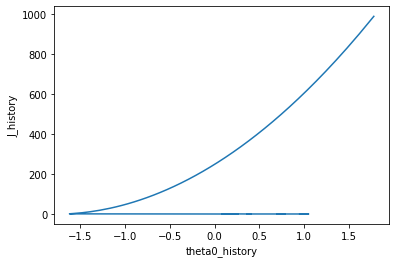

In [31]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta0_history")
plt.plot(theta0_history,J_history )

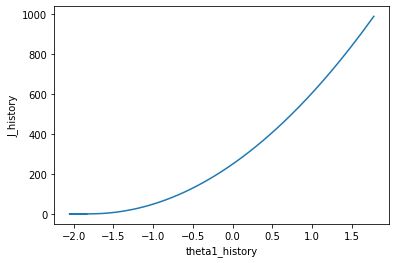

In [32]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta1_history")
plt.plot(theta1_history,J_history )

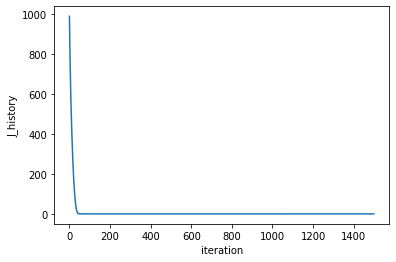

In [33]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )

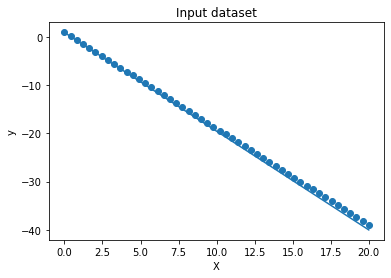

In [34]:
plt.scatter(x = X[:,1] , y = y )
plt.plot( X[:,1] , theta[1]*X[:,1]+theta[0] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

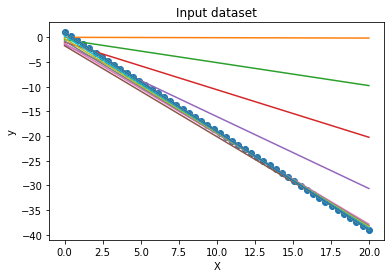

In [47]:
plt.scatter(x=X[:,1], y=y)
plt.plot( X[:,1] , theta[1]* X[:,1] + theta[0]  )
for i in range(1, 1500 ,50):
    plt.plot( X[:,1] , theta1_history[i]*X[:,1]+theta0_history[i] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

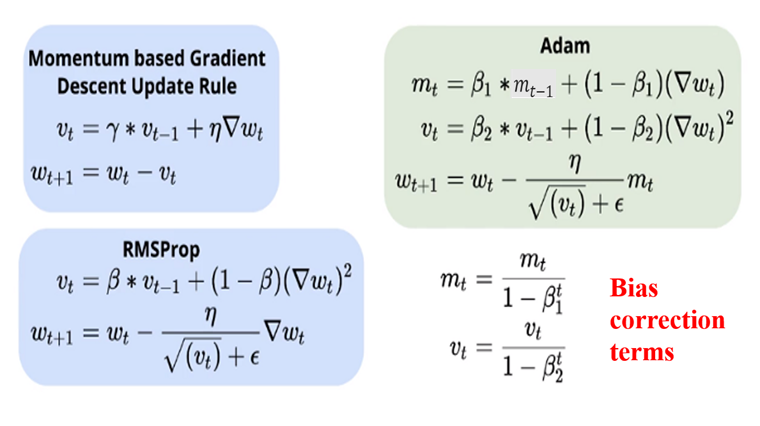

In [36]:

def gradient_descentttt(X, y,theta=np.array([[0],[0]]),V=np.array([[0],[0]]),M=np.array([[0],[0]]), alpha=0.01, num_iterations=1500,beta1=0.2,beta2=0.2):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    #print(theta)
    theta = theta.reshape(2,1)
    V=V.reshape(2,1)
    
    for i in range(1500):
        
        
        error = (np.dot(X, theta) - y)
        term0 = (1/m) * sum(error* X[:,[0]].reshape(m,1))
        term1 = (1/m) * sum(error* X[:,[1]].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]]).reshape(2,1)
        
      
        
        V = (V*beta2) +  ((1-beta2)* np.square(term_vector)) 
        
        M = (beta1 * M )+((1-beta1)* term_vector  )
        
        theta = theta - ((alpha* M)/(epsilon +np.sqrt(V) ))
        #print(theta)
        
        # store history values
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
        J_history.append(compute_cost(X,y,theta)[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [37]:
%%time
alpha=0.01
num_iterations=100
theta_init=np.array([[0],[0]])
v_init=np.array([[0],[0]])
jama=0.9
beta1=0.9
beta2=0.9
M=np.array([[0],[0]])
theta, J_history, theta0_history, theta1_history = gradient_descentttt(X ,y , theta_init, v_init ,M, alpha , num_iterations,beta1,beta2)

CPU times: user 282 ms, sys: 0 ns, total: 282 ms
Wall time: 280 ms


In [38]:
theta

array([[ 0.99958801],
       [-2.00041199]])

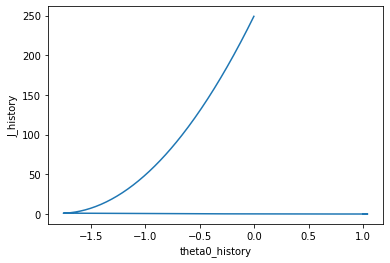

In [39]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta0_history")
plt.plot(theta0_history,J_history )

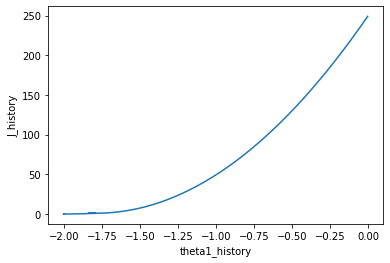

In [40]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta1_history")
plt.plot(theta1_history,J_history )

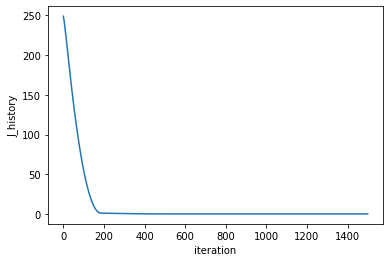

In [41]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )

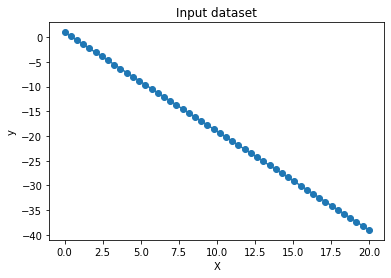

In [42]:
plt.scatter(x = X[:,1] , y = y )
plt.plot( X[:,1] , theta[1]*X[:,1]+theta[0] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

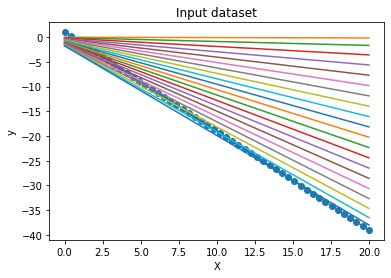

In [43]:
plt.scatter(x=X[:,1], y=y)
plt.plot( X[:,1] , theta[1]* X[:,1] + theta[0]  )
for i in range(1, 200 ,10):
    plt.plot( X[:,1] , theta1_history[i]*X[:,1]+theta0_history[i] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

## Congratulations 
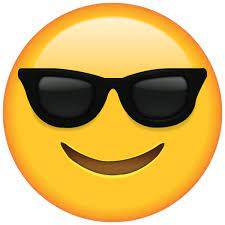